In [4]:
import pandas as pd

Identify the "winning" hyperparameters

In [5]:
df = pd.read_csv("../runs/runs_rna_imputed/krr/results.csv")
test_df = df[df['index'] == 'test']

# Group by hyperparameter set
grouped = test_df.groupby('hyperparams').agg({'auc_r2': 'mean'}).reset_index()

# Pick best performing params on average
best_params = grouped.sort_values('auc_r2', ascending=False).iloc[0]['hyperparams']
print("Best average hyperparams:", best_params)

Best average hyperparams: degree_2_alpha_100


## Get the features used in the model

In [27]:
df

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAGAB,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
id,,,,,,,,,,,,,,,,,,,,,
22RV1,3.14726,0.49601,0.93942,-2.92012,-1.04934,6.11143,6.47835,-6.33800,3.38413,6.18958,...,6.48538,7.67595,2.30577,3.60645,5.09844,0.53990,5.93768,3.74117,6.67017,6.18663
42MGBA,3.27378,-5.00602,-1.56290,-6.63151,1.79248,5.85038,5.01430,-3.77915,3.50006,6.15029,...,6.40071,7.41495,1.50223,3.20914,4.46898,-4.25111,5.59432,7.70597,6.35391,6.32705
5637,-1.13519,-5.49118,-2.02485,-0.54724,3.14841,5.57634,5.98401,-1.65521,4.95849,6.40994,...,5.85087,7.16353,2.32910,4.26696,4.67913,-1.78989,5.03536,8.10887,6.04084,5.67770
647V,0.23115,-6.00679,-0.49456,-0.76422,3.33376,5.63590,6.19992,-4.80155,2.79002,6.55739,...,5.51439,7.09969,2.61715,4.01014,4.73379,1.28625,5.05240,7.81134,6.31929,5.66191
769P,-3.26799,-1.81202,-2.79191,-6.43468,2.86912,5.88937,5.46149,-5.13159,2.65778,6.27666,...,6.20947,7.33693,1.95665,3.91360,4.31586,-0.09380,4.61029,7.74895,5.93129,5.94074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YD8,0.52325,-3.97423,1.37031,-4.85759,5.87614,5.38706,5.53392,-0.46240,1.97298,6.08783,...,5.51249,5.70507,2.90823,4.57651,4.77855,0.77506,6.21376,8.12963,6.62664,5.99719
YH13,3.85212,-4.50653,0.64576,-4.70549,2.75130,5.56240,4.95155,-1.94036,3.30892,5.97880,...,6.04940,6.21049,2.98832,3.48810,4.69874,-3.71871,5.60834,7.90521,6.18773,6.12299
YKG1,2.76088,-4.46804,1.13729,-5.32821,2.64224,5.74626,5.52940,-3.01633,3.24191,6.10845,...,5.94247,6.47542,2.40572,3.47242,4.63629,-3.59457,5.44809,7.41655,6.27717,5.88871


In [164]:
df = pd.read_csv("../data/Cleveland/rna_imputed.csv")
df.set_index("id", inplace=True)
model_features = list(df.columns)
print(len(model_features))

15278


In [167]:
dfmice = pd.read_csv("../data/Mice/data_mrna_seq_rpkm.txt", sep="\t", index_col=0)
# mice RNA data had repeated values in Hugo_SYmbol column - this just fixes that
dfmice = dfmice[~dfmice.index.duplicated(keep=False) | dfmice.index.duplicated(keep='first')]
# we need to log2 transform it as well
dfmice= np.log2(dfmice + 1)

# gene_means = df.mean(axis=0)
# gene_stds = df.std(axis=0)

# # Apply those to the new dataset
# dfmice_zscored = dfmice_log_data.sub(gene_means, axis=0).div(gene_stds, axis=0)
# dfmice = dfmice_zscored.dropna()

dfmice

,Mayo-PDX-Sarkaria-3,Mayo-PDX-Sarkaria-5,Mayo-PDX-Sarkaria-6,Mayo-PDX-Sarkaria-8,Mayo-PDX-Sarkaria-10,Mayo-PDX-Sarkaria-12,Mayo-PDX-Sarkaria-14,Mayo-PDX-Sarkaria-22,Mayo-PDX-Sarkaria-26,Mayo-PDX-Sarkaria-28,...,Mayo-PDX-Sarkaria-231,Mayo-PDX-Sarkaria-232,Mayo-PDX-Sarkaria-238,Mayo-PDX-Sarkaria-242,Mayo-PDX-Sarkaria-245,Mayo-PDX-Sarkaria-280A,Mayo-PDX-Sarkaria-64,Mayo-PDX-Sarkaria-150,Mayo-PDX-Sarkaria-115,Mayo-PDX-Sarkaria-134
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
CPN1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERLIN1,2.459432,2.765535,3.193772,3.099295,3.803227,3.595742,4.078951,3.987321,3.195348,3.815575,...,2.845992,2.861955,3.721373,3.097611,2.495695,3.092546,3.078951,4.189034,3.491853,3.308885
CHUK,1.722466,2.427606,2.017922,1.641546,2.570463,2.733354,2.459432,2.280956,2.137504,2.625270,...,1.914565,1.970854,2.269033,1.432959,2.140779,1.622930,2.809414,1.963474,2.480265,1.937344
CWF19L1,2.066950,2.313246,2.063503,2.226509,3.100978,3.313246,2.599318,3.060047,2.289834,2.669027,...,2.341986,2.553361,2.803227,2.025029,2.424922,2.204767,2.861955,2.147307,2.735522,2.330558
BLOC1S2,3.430285,3.206331,2.650765,2.625270,3.451541,3.365972,2.908813,2.648465,2.587365,2.558268,...,2.553361,2.541019,3.026800,2.853996,2.121015,2.805292,3.865919,4.074677,3.460743,3.117695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC009491.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC009491.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC006156.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [112]:
dfmice.isna().sum().sum()

0

In [168]:
mice_feats = set(dfmice.index.values)
# sorted(mice_feats)

In [169]:
missing_features = []
for a in model_features:
    if not (a in mice_feats):
        missing_features.append(a)
print(f"Mice RNA data has {len(missing_features)} missing features (in comparison to RNA imputed data)")

Mice RNA data has 916 missing features (in comparison to RNA imputed data)


First missing value strategy - fill with a mean value

In [170]:
test_df = dfmice

imputed_df = []
for feature in missing_features:
    mean_val = df[feature].mean()
    new_row = pd.Series([mean_val] * test_df.shape[1], index=test_df.columns, name=feature)
    test_df = pd.concat([test_df, new_row.to_frame().T])
test_df

,Mayo-PDX-Sarkaria-3,Mayo-PDX-Sarkaria-5,Mayo-PDX-Sarkaria-6,Mayo-PDX-Sarkaria-8,Mayo-PDX-Sarkaria-10,Mayo-PDX-Sarkaria-12,Mayo-PDX-Sarkaria-14,Mayo-PDX-Sarkaria-22,Mayo-PDX-Sarkaria-26,Mayo-PDX-Sarkaria-28,...,Mayo-PDX-Sarkaria-231,Mayo-PDX-Sarkaria-232,Mayo-PDX-Sarkaria-238,Mayo-PDX-Sarkaria-242,Mayo-PDX-Sarkaria-245,Mayo-PDX-Sarkaria-280A,Mayo-PDX-Sarkaria-64,Mayo-PDX-Sarkaria-150,Mayo-PDX-Sarkaria-115,Mayo-PDX-Sarkaria-134
CPN1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERLIN1,2.459432,2.765535,3.193772,3.099295,3.803227,3.595742,4.078951,3.987321,3.195348,3.815575,...,2.845992,2.861955,3.721373,3.097611,2.495695,3.092546,3.078951,4.189034,3.491853,3.308885
CHUK,1.722466,2.427606,2.017922,1.641546,2.570463,2.733354,2.459432,2.280956,2.137504,2.625270,...,1.914565,1.970854,2.269033,1.432959,2.140779,1.622930,2.809414,1.963474,2.480265,1.937344
CWF19L1,2.066950,2.313246,2.063503,2.226509,3.100978,3.313246,2.599318,3.060047,2.289834,2.669027,...,2.341986,2.553361,2.803227,2.025029,2.424922,2.204767,2.861955,2.147307,2.735522,2.330558
BLOC1S2,3.430285,3.206331,2.650765,2.625270,3.451541,3.365972,2.908813,2.648465,2.587365,2.558268,...,2.553361,2.541019,3.026800,2.853996,2.121015,2.805292,3.865919,4.074677,3.460743,3.117695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF875,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,...,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038,4.409038
ZNF888,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,...,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132,2.757132
ZNRD2,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,...,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624,4.750624
ZSWIM9,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,...,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019,3.654019


In [171]:
len(set(test_df.index))

20464

In [172]:
missing = [f for f in model_features if f not in test_df.index]
print(f"Missing features: {len(missing)}")

test_df = test_df.loc[model_features].T
test_df.to_csv('data/test_rna_imputed')

Missing features: 0


In [173]:
test_df

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAGAB,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Mayo-PDX-Sarkaria-3,1.989139,0.014355,0.678072,2.488001,0.028569,4.301588,1.678072,0.014355,2.127633,3.468583,...,2.516015,4.104337,1.718088,2.097611,2.978196,0.286881,3.282440,4.053111,2.809414,2.636915
Mayo-PDX-Sarkaria-5,1.613532,0.000000,0.411426,0.014355,0.000000,3.805292,1.056584,0.014355,2.998196,3.257011,...,3.628774,5.355439,1.232661,1.748461,2.283922,0.344828,2.981853,4.521051,2.582556,2.867896
Mayo-PDX-Sarkaria-6,0.765535,0.000000,6.499686,0.014355,0.014355,3.757023,1.411426,0.000000,2.570463,3.985500,...,3.718088,4.694880,1.150560,1.807355,2.746313,0.042644,3.407353,5.331275,2.643856,2.881665
Mayo-PDX-Sarkaria-8,0.189034,0.000000,6.851999,0.773996,0.084064,3.475085,1.182692,0.000000,2.169925,3.232661,...,2.584963,3.082362,1.627607,1.989139,2.620586,0.042644,3.867896,6.163096,2.459432,2.963474
Mayo-PDX-Sarkaria-10,0.214125,0.000000,0.464668,0.000000,2.669027,3.347666,1.859970,0.000000,1.622930,4.076388,...,3.966246,6.360891,1.510962,2.217231,2.516015,0.000000,4.441616,6.180705,2.718088,2.370164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mayo-PDX-Sarkaria-280A,1.948601,0.000000,4.116032,0.124328,0.000000,3.305971,0.713696,0.000000,2.689299,3.212569,...,2.456806,3.699330,1.356144,2.198494,2.280956,0.042644,3.791814,7.606146,2.570463,2.754888
Mayo-PDX-Sarkaria-64,2.207893,0.000000,2.821710,0.042644,0.070389,3.938286,1.599318,0.000000,3.100978,2.693766,...,2.528571,5.555203,1.117695,1.794936,3.056584,0.704872,3.168321,6.376777,3.189034,2.263034
Mayo-PDX-Sarkaria-150,2.053111,0.000000,0.124328,0.000000,0.014355,3.243364,0.839960,0.000000,1.815575,3.720278,...,3.582556,4.365972,1.144046,1.867896,2.528571,0.056584,2.498251,6.666757,1.967169,2.684819
Mayo-PDX-Sarkaria-115,1.655352,0.014355,0.773996,0.014355,0.000000,3.924100,1.773996,0.000000,3.304511,3.833902,...,3.263034,5.277241,1.077243,1.560715,2.684819,0.028569,3.255501,7.202124,2.788686,2.629939


# Testing the scaling used for the data

In [87]:
import numpy as np

In [99]:
zscore_data = dfmice.sub(dfmice.mean(axis=1), axis=0) 
                    #   .div(dfmice.std(axis=1), axis=0)

In [100]:
zscore_data

,Mayo-PDX-Sarkaria-3,Mayo-PDX-Sarkaria-5,Mayo-PDX-Sarkaria-6,Mayo-PDX-Sarkaria-8,Mayo-PDX-Sarkaria-10,Mayo-PDX-Sarkaria-12,Mayo-PDX-Sarkaria-14,Mayo-PDX-Sarkaria-22,Mayo-PDX-Sarkaria-26,Mayo-PDX-Sarkaria-28,...,Mayo-PDX-Sarkaria-231,Mayo-PDX-Sarkaria-232,Mayo-PDX-Sarkaria-238,Mayo-PDX-Sarkaria-242,Mayo-PDX-Sarkaria-245,Mayo-PDX-Sarkaria-280A,Mayo-PDX-Sarkaria-64,Mayo-PDX-Sarkaria-150,Mayo-PDX-Sarkaria-115,Mayo-PDX-Sarkaria-134
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
CPN1,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,...,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780,-0.042780
ERLIN1,-0.694716,-0.388612,0.039625,-0.054852,0.649080,0.441595,0.924804,0.833174,0.041200,0.661428,...,-0.308155,-0.292192,0.567225,-0.056536,-0.658452,-0.061601,-0.075196,1.034887,0.337706,0.154738
CHUK,-0.482327,0.222813,-0.186871,-0.563247,0.365670,0.528562,0.254639,0.076164,-0.067289,0.420478,...,-0.290228,-0.233939,0.064240,-0.771833,-0.064014,-0.581862,0.604622,-0.241319,0.275472,-0.267448
CWF19L1,-0.434727,-0.188432,-0.438175,-0.275169,0.599300,0.811568,0.097640,0.558370,-0.211843,0.167349,...,-0.159692,0.051683,0.301549,-0.476649,-0.076755,-0.296911,0.360278,-0.354371,0.233845,-0.171119
BLOC1S2,0.341950,0.117995,-0.437571,-0.463065,0.363206,0.277637,-0.179522,-0.439870,-0.500970,-0.530068,...,-0.534975,-0.547316,-0.061535,-0.234340,-0.967320,-0.283043,0.777584,0.986341,0.372407,0.029360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC009491.2,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,...,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139,-0.009139
AC009491.1,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,...,-0.006284,0.144275,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284,-0.006284
AC006156.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [131]:
print(np.min(dfmice.values))
print(np.max(dfmice.values))

print(np.min(zscore_data.values))
print(np.max(zscore_data.values))
print(np.mean(zscore_data.values))

print("origibnal mice zscore.txt")
print(np.min(zscore.values))
print(np.max(zscore.values))
print(np.mean(zscore.values))

print("imputed data.txt")
print(np.min(df.values))
print(np.max(df.values))
print(np.mean(df.values))

-22.657760394011927
28.779518320200477
-7.305298091489806
10.408101256288168
-3.7185735127922847e-17
origibnal mice zscore.txt
-8275262989120000.0
7.8074
-9044225285065.242
imputed data.txt
-11.39522
17.14427
3.18137413668156


In [108]:
zscore = pd.read_csv("..\data\Mice\data_mrna_seq_rpkm_zscores_ref_all_samples.txt", sep="\t", index_col=0).dropna()
zscore

,Mayo-PDX-Sarkaria-3,Mayo-PDX-Sarkaria-5,Mayo-PDX-Sarkaria-6,Mayo-PDX-Sarkaria-8,Mayo-PDX-Sarkaria-10,Mayo-PDX-Sarkaria-12,Mayo-PDX-Sarkaria-14,Mayo-PDX-Sarkaria-22,Mayo-PDX-Sarkaria-26,Mayo-PDX-Sarkaria-28,...,Mayo-PDX-Sarkaria-231,Mayo-PDX-Sarkaria-232,Mayo-PDX-Sarkaria-238,Mayo-PDX-Sarkaria-242,Mayo-PDX-Sarkaria-245,Mayo-PDX-Sarkaria-280A,Mayo-PDX-Sarkaria-64,Mayo-PDX-Sarkaria-150,Mayo-PDX-Sarkaria-115,Mayo-PDX-Sarkaria-134
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
CPN1,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,...,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335,-0.6335
ERLIN1,-1.3282,-0.7429,0.0758,-0.1049,1.2409,0.8442,1.7680,1.5929,0.0788,1.2645,...,-0.5891,-0.5586,1.0844,-0.1081,-1.2588,-0.1178,-0.1438,1.9785,0.6456,0.2958
CHUK,-1.2328,0.5695,-0.4776,-1.4396,0.9346,1.3510,0.6508,0.1947,-0.1720,1.0747,...,-0.7418,-0.5979,0.1642,-1.9727,-0.1636,-1.4872,1.5454,-0.6168,0.7041,-0.6836
CWF19L1,-1.0181,-0.4413,-1.0262,-0.6444,1.4035,1.9006,0.2287,1.3076,-0.4961,0.3919,...,-0.3740,0.1210,0.7062,-1.1163,-0.1798,-0.6953,0.8437,-0.8299,0.5476,-0.4007
BLOC1S2,0.6754,0.2330,-0.8642,-0.9146,0.7173,0.5483,-0.3546,-0.8688,-0.9894,-1.0469,...,-1.0566,-1.0810,-0.1215,-0.4628,-1.9105,-0.5590,1.5357,1.9480,0.7355,0.0580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC010722.1,-0.7556,-0.6614,-0.7556,-0.7556,-0.7556,-0.7364,-0.7556,-0.7556,-0.7556,-0.7556,...,-0.7556,-0.7556,-0.7556,-0.7556,-0.2490,-0.7556,-0.7556,-0.7556,-0.7556,-0.7556
AMELY,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,...,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319,-1.2319
AC013412.1,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,...,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186,-1.3186


### data used by MOSA - investigation

In [174]:
mdf = pd.read_csv('data/transcriptomics_used_by_MOSA.csv', index_col=0)
print(np.min(mdf.values))
print(np.max(mdf.values))
print(np.mean(mdf.values))
print(np.mean(mdf, axis=1))
mdf

-12.39979
18.18559
3.0500933108310044
TSPAN6      3.880827
DPM1        5.933543
SCYL3       4.050007
C1orf112    4.532173
FGR        -3.197259
              ...   
MRPL45      5.626656
GATD3B      1.795265
PLAC4      -2.921473
CCDC163     1.605454
PAGR1       2.989013
Length: 15320, dtype: float64


,SIDM00001,SIDM00002,SIDM00003,SIDM00005,SIDM00006,SIDM00007,SIDM00008,SIDM00009,SIDM00011,SIDM00014,...,SIDM01242,SIDM01245,SIDM01246,SIDM01247,SIDM01248,SIDM01251,SIDM01254,SIDM01257,SIDM01259,SIDM01265
TSPAN6,0.75729,7.65744,5.61508,0.36888,4.66158,5.32308,4.41916,-1.09857,4.56781,6.88477,...,5.55593,-1.79880,5.49378,-1.43551,3.42825,-1.28025,-2.04206,7.78855,-2.89679,-2.26234
DPM1,6.23646,6.29216,6.37602,6.00579,6.66767,5.70958,6.76630,5.61644,5.85134,5.44953,...,6.66259,5.48330,5.63693,6.75202,6.17700,5.79241,5.88186,6.51437,6.26231,6.30255
SCYL3,4.84944,3.88304,3.63928,4.85913,4.79121,3.67041,3.73938,5.28598,4.03029,4.42858,...,4.53711,4.33029,3.88219,4.15441,3.94039,4.48879,4.35285,3.95398,5.20274,5.25807
C1orf112,4.37381,5.01620,5.76260,4.76749,5.47648,4.99831,4.60612,4.68705,4.64851,4.43737,...,4.57728,6.11943,4.47425,5.40037,3.61152,5.17889,5.19811,5.51743,6.38181,5.89193
FGR,7.58287,-2.69283,-5.65854,-3.86223,-6.09501,-5.15679,-3.99550,7.56214,1.68384,-0.15089,...,-4.45416,-3.39618,-2.62368,3.63683,-1.89909,-2.32024,7.31536,-5.36757,-2.60011,-3.15965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRPL45,5.95229,6.41500,5.83264,6.09321,4.66217,5.66149,6.35379,5.51997,5.15175,6.02656,...,5.92789,5.93682,6.21045,5.62771,4.95545,6.40101,6.00753,6.30461,5.28855,5.30168
GATD3B,3.75635,1.45473,2.33398,2.92629,-1.09278,1.75264,2.29844,2.68750,1.39718,1.87758,...,2.61702,2.07336,-0.14082,2.06221,1.61574,2.27183,3.32562,2.71696,2.83465,2.40364
PLAC4,-5.80208,-3.37783,-2.25561,-0.80336,-3.72468,-4.16946,-2.37764,-4.08930,0.04041,-3.57368,...,-1.82176,-2.59654,-5.93454,-3.15217,-2.25159,-1.93144,-7.21567,-3.13045,-3.22404,-7.29828
CCDC163,3.44000,2.40747,0.02216,1.92033,0.94229,1.95898,1.34057,1.73854,1.74674,2.30448,...,1.00216,3.68665,1.26926,3.63032,1.89575,1.88740,2.24921,3.96517,5.94360,2.58849


In [175]:
mdf['SIDM01163']

TSPAN6      4.28149
DPM1        5.33864
SCYL3       4.05510
C1orf112    4.00588
FGR        -3.93456
             ...   
MRPL45      5.72651
GATD3B      2.08844
PLAC4      -2.69611
CCDC163     1.75031
PAGR1       2.73461
Name: SIDM01163, Length: 15320, dtype: float64

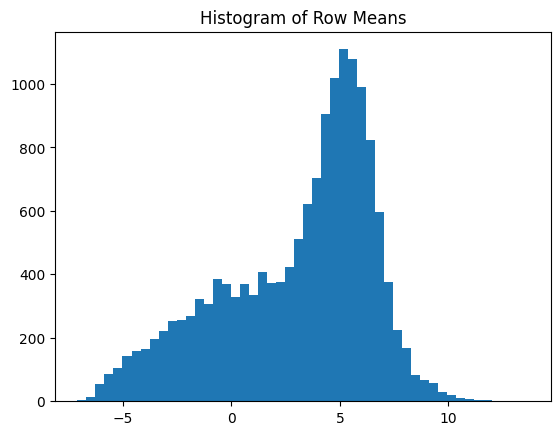

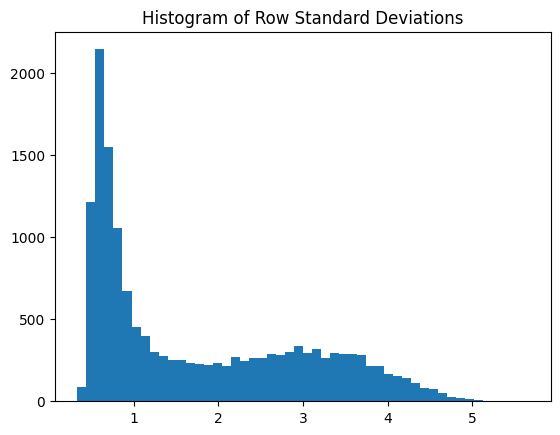

In [154]:
import matplotlib.pyplot as plt

# Check per-gene (row-wise) mean and standard deviation
row_means = mdf.mean(axis=1)
row_stds = mdf.std(axis=1)

plt.hist(row_means, bins=50)
plt.title("Histogram of Row Means")
plt.show()

plt.hist(row_stds, bins=50)
plt.title("Histogram of Row Standard Deviations")
plt.show()


In [141]:
idf = pd.read_csv('../data/Mice/data_mrna_seq_rpkm.txt', sep="\t", index_col=0)
print(np.min(idf.values))
print(np.max(idf.values))
print(np.mean(idf.values))
idf

0.0
5933.23
10.196649625861724


,Mayo-PDX-Sarkaria-3,Mayo-PDX-Sarkaria-5,Mayo-PDX-Sarkaria-6,Mayo-PDX-Sarkaria-8,Mayo-PDX-Sarkaria-10,Mayo-PDX-Sarkaria-12,Mayo-PDX-Sarkaria-14,Mayo-PDX-Sarkaria-22,Mayo-PDX-Sarkaria-26,Mayo-PDX-Sarkaria-28,...,Mayo-PDX-Sarkaria-231,Mayo-PDX-Sarkaria-232,Mayo-PDX-Sarkaria-238,Mayo-PDX-Sarkaria-242,Mayo-PDX-Sarkaria-245,Mayo-PDX-Sarkaria-280A,Mayo-PDX-Sarkaria-64,Mayo-PDX-Sarkaria-150,Mayo-PDX-Sarkaria-115,Mayo-PDX-Sarkaria-134
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
CPN1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ERLIN1,4.50,5.80,8.15,7.57,12.96,11.09,15.90,14.86,8.16,13.08,...,6.19,6.27,12.19,7.56,4.64,7.53,7.45,17.24,10.25,8.91
CHUK,2.30,4.38,3.05,2.12,4.94,5.65,4.50,3.86,3.40,5.17,...,2.77,2.92,3.82,1.70,3.41,2.08,6.01,2.90,4.58,2.83
CWF19L1,3.19,3.97,3.18,3.68,7.58,8.94,5.06,7.34,3.89,5.36,...,4.07,4.87,5.98,3.07,4.37,3.61,6.27,3.43,5.66,4.03
BLOC1S2,9.78,8.23,5.28,5.17,9.94,9.31,6.51,5.27,5.01,4.89,...,4.87,4.82,7.15,6.23,3.35,5.99,13.58,15.85,10.01,7.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC009491.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AC009491.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AC006156.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [158]:
df = pd.read_csv('../data/Cleveland/Expression_Public_25Q2_subsetted.csv', index_col=0)


In [159]:
df.loc['ACH-000405']

TSPAN6    0.883103
TNMD      0.000000
DPM1      6.741750
SCYL3     3.410184
FIRRM     3.904022
            ...   
PANO1     0.823938
HRURF     0.000000
PRRC2B    6.205731
F8A2      0.000000
F8A1      5.041861
Name: ACH-000405, Length: 19205, dtype: float64

In [162]:
print(np.min(df.values))
print(np.max(df.values))
print(np.mean(df.values))

dfl = np.log2(df + 1)

print(np.min(dfl.values))
print(np.max(dfl.values))
print(np.mean(dfl.values))
dfl.loc['ACH-000405']

0.0
17.36064136204501
2.6736057685685832
0.0
4.198544549809059
1.46476591421568


TSPAN6    0.913112
TNMD      0.000000
DPM1      2.952660
SCYL3     2.140839
FIRRM     2.293965
            ...   
PANO1     0.867056
HRURF     0.000000
PRRC2B    2.849145
F8A2      0.000000
F8A1      2.594993
Name: ACH-000405, Length: 19205, dtype: float64

Rdata

In [187]:
with open("data/cell_lines_used_in_rdata_cosmic_id.txt", "r") as f:
    rdata_list = [line.strip() for line in f]

# Check
print(rdata_list[:5])


df = pd.read_csv("../data/Cleveland/model_list_20250423.csv")
df_cosmics = df['COSMIC_ID'].unique()


count = 0
for r in rdata_list:
    if r in df_cosmics:
        count +=1


['724878', '1330955', '905984', '753611', 'NA']


In [188]:
count

1066

# Testing scaling used for the methylation data

In [201]:
print(np.sum(df.values > 1.0))

4048


In [208]:
mosa_original_methylation = '../data/Imputed/methylation.csv'
mosa_imputed_methylation = '../data/Imputed/20231023_092657_imputed_methylation.csv.gz'
mice_methylation = '../mean_methylation_experiments/data_methylation_hm450.txt'



df = pd.read_csv(mice_methylation, index_col=0, sep='\t')

df.drop(['Entrez_Gene_Id'], inplace=True, axis=1)

print(np.min(df))
print(np.max(df))
print(np.mean(df))


df

0.0
0.997592395359009
0.3630636202892851


,Mayo-PDX-Sarkaria-167,Mayo-PDX-Sarkaria-159,Mayo-PDX-Sarkaria-9,Mayo-PDX-Sarkaria-168,Mayo-PDX-Sarkaria-114,Mayo-PDX-Sarkaria-61,Mayo-PDX-Sarkaria-182,Mayo-PDX-Sarkaria-170,Mayo-PDX-Sarkaria-8,Mayo-PDX-Sarkaria-122,...,Mayo-PDX-Sarkaria-43,Mayo-PDX-Sarkaria-44,Mayo-PDX-Sarkaria-56,Mayo-PDX-Sarkaria-6,Mayo-PDX-Sarkaria-64,Mayo-PDX-Sarkaria-66,Mayo-PDX-Sarkaria-67,Mayo-PDX-Sarkaria-69,Mayo-PDX-Sarkaria-85,Mayo-PDX-Sarkaria-91
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
BRAT1,0.853678,0.671721,0.422548,0.815492,0.848128,0.550961,0.766068,0.439902,0.800645,0.836853,...,0.175899,0.800141,0.628108,0.827451,0.821393,0.857614,0.757052,0.826739,0.848498,0.291064
MAN1B1,0.713272,0.846278,0.766221,0.871540,0.707992,0.675131,0.838506,0.847752,0.797533,0.782126,...,0.629355,0.651117,0.772536,0.786384,0.852410,0.826622,0.822181,0.725353,0.796867,0.678068
GBE1,0.285983,0.284535,0.282522,0.237509,0.378794,0.250298,0.268556,0.228314,0.260457,0.262373,...,0.295463,0.187003,0.271938,0.276940,0.460299,0.311387,0.289102,0.282737,0.296432,0.403204
LOC283050,0.114177,0.084241,0.037556,0.031451,0.039532,0.033215,0.031714,0.018553,0.031544,0.017168,...,0.340190,0.046507,0.036495,0.048216,0.023656,0.033189,0.034726,0.081695,0.024967,0.078415
PINK1,0.017230,0.031675,0.027787,0.023257,0.063177,0.026458,0.021186,0.024719,0.032586,0.026414,...,0.258148,0.056419,0.035809,0.052586,0.039329,0.033387,0.028472,0.046274,0.026302,0.331467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMPCA,0.089719,0.226797,0.171147,0.199747,0.267739,0.191046,0.171641,0.140792,0.194583,0.155940,...,0.033201,0.057555,0.119498,0.207417,0.096903,0.162093,0.113206,0.136420,0.159153,0.316044
GNA14,0.209706,0.499411,0.246947,0.232724,0.207846,0.214973,0.235426,0.210566,0.198927,0.234783,...,0.316972,0.143835,0.229783,0.149070,0.043969,0.091796,0.217424,0.242872,0.240431,0.228265
DOCK11,0.216767,0.227676,0.260010,0.237469,0.142897,0.185642,0.261868,0.199793,0.139218,0.141856,...,0.273392,0.080256,0.187391,0.207360,0.096599,0.261045,0.182353,0.181397,0.183717,0.046517


# Are the training predictions even good?


In [218]:
data_name = "methylation_imputed"
model_name = "enet"

df = pd.read_csv(f'../runs/runs_modules/MICE/{data_name}/{model_name}/best/train_results.csv', index_col=0)
df.head()

res_df = pd.read_csv(f'../runs/runs_modules/MICE/{data_name}/{model_name}/best/summary_results.csv', index_col=0)
print(f"Training r2: {res_df['auc_r2']}")

Training r2: train    0.275238
Name: auc_r2, dtype: float64


In [219]:
df['auc'].median()

2.74436594063525

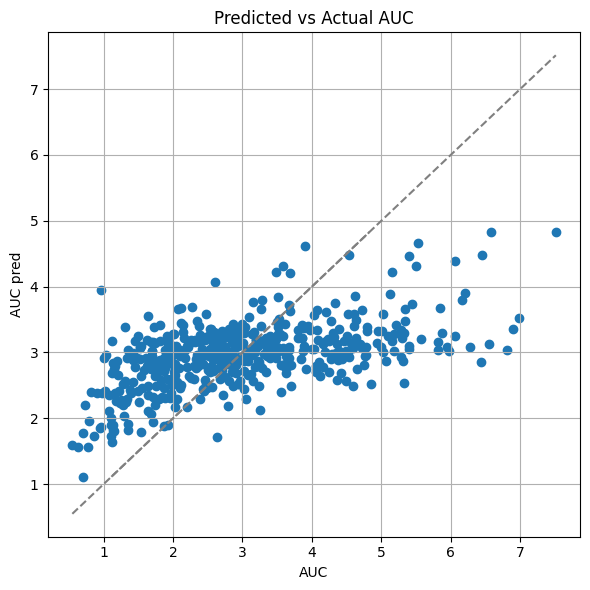

In [220]:
plt.figure(figsize=(6, 6))
plt.scatter(df["auc"], df["auc_pred"])
plt.xlabel("AUC")
plt.ylabel("AUC pred")
plt.title("Predicted vs Actual AUC")
plt.plot([df.min(), df.max()],
         [df.min(), df.max()],
         linestyle='--', color='gray')  # identity line

plt.grid(True)
plt.tight_layout()
plt.show()

# What is the range od RT_Ratio?

In [13]:
import matplotlib.pyplot as plt

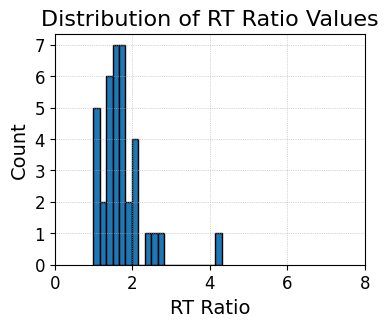

In [15]:
df = pd.read_csv("../data/Mice/PDX_response_to_standard_therapy.csv")


list_auc = df['RT_Ratio'].values

plt.figure(figsize=(4,3))
plt.hist(list_auc, bins=20, edgecolor='black')
plt.title("Distribution of RT Ratio Values", fontsize=16)
plt.xlabel("RT Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

In [18]:
df

,PDX_Line,PDX MGMT,TMZ_Placebo,TMZ,TMZ_Ratio,RT_Placebo,RT,RT_Ratio,RT_and_TMZ_Placebo,RT_and_TMZ,RT_and_TMZ_Ratio,patient_tumor_type,patient_OS,patient_treatment
0,5,M,54.00,321.00,5.94,54.0,138.5,2.56,54.00,341.00,6.31,Primary,30.8,RT + Carmustine
1,6,U,41.00,56.00,1.37,41.0,40.5,0.99,41.00,36.50,0.89,Primary,12.6,RT
2,8,M,58.50,123.50,2.11,58.5,107.0,1.83,58.50,189.00,3.23,Primary,16.1,RT
3,10,U,41.00,55.00,1.34,41.0,66.0,1.61,41.00,76.00,1.85,Recur/Prog,7.5,Observation
4,12,M,15.00,53.00,3.53,15.0,37.0,2.47,15.00,85.50,5.70,Primary,2.9,RT
5,14,U,33.00,186.00,5.64,33.0,55.5,1.68,33.00,188.00,5.70,Recur,4.5,RT + Gefitinib
6,15,M,54.00,252.50,4.68,54.0,232.5,4.31,54.00,252.00,4.67,Unknown,NaN,-
7,16,M,47.50,325.50,6.85,47.5,64.0,1.35,47.50,342.50,7.21,Unknown,NaN,-
8,22,M,43.00,154.50,3.59,43.0,43.0,1.00,43.00,325.50,7.57,Primary,2.5,Palliative
9,26,U,82.50,99.50,1.21,82.5,128.5,1.56,82.50,128.50,1.56,Primary,8.7,RT


In [17]:
list_auc.max()

4.31